In [1]:
%matplotlib inline
import numpy as np
import pymc3 as pm
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

# read the simulated data

In [4]:
quietFile1 = open('radio-quiet-a.txt','r')
quietFile1Rows = (quietFile1Row.strip().split() for quietFile1Row in quietFile1)
qF1R = zip(*quietFile1Rows)

In [6]:
quietFile2 = open('radio-quiet-b.txt','r')
quietFile2Rows = (quietFile2Row.strip().split() for quietFile2Row in quietFile2)
qF2R = zip(*quietFile2Rows)

In [7]:
loudFile1 = open('radio-loud-a.txt','r')
loudFile1Rows = (loudFile1Row.strip().split() for loudFile1Row in loudFile1)
lF1R = zip(*loudFile1Rows)

In [32]:
loudFile2 = open('radio-loud-b.txt','r')
loudFile2Rows = (loudFile2Row.strip().split() for loudFile2Row in loudFile2)
lF2R = zip(*loudFile2Rows)

# P

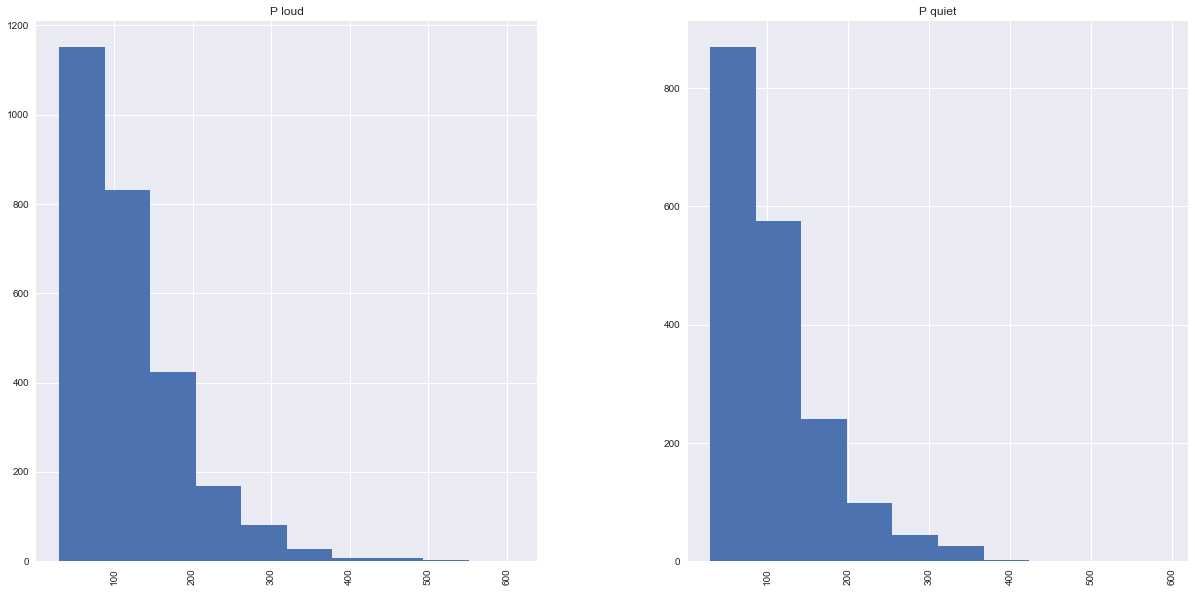

In [47]:
P_quiet = np.array(map(float, qF1R[0]))
P_loud = np.array(map(float, lF1R[0]))

y1 = P_quiet*1000
y2 = P_loud*1000
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['P quiet']*len(P_quiet), ['P loud']*len(P_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [13]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() *0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [14]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [09:15<00:00, 395.88it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10f74d4d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1140189d0>], dtype=object)

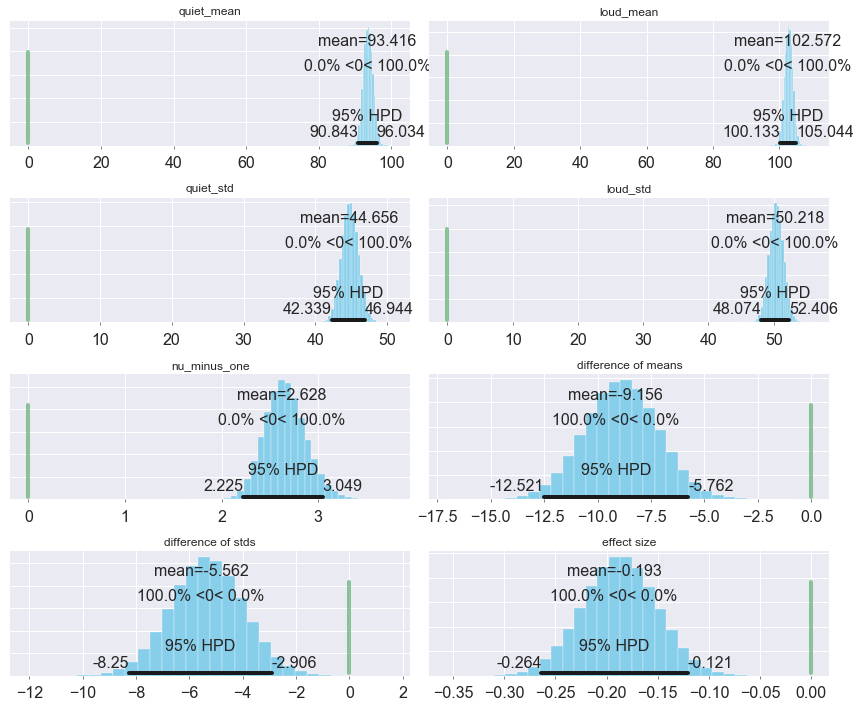

In [15]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x114096150>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10e530ed0>], dtype=object)

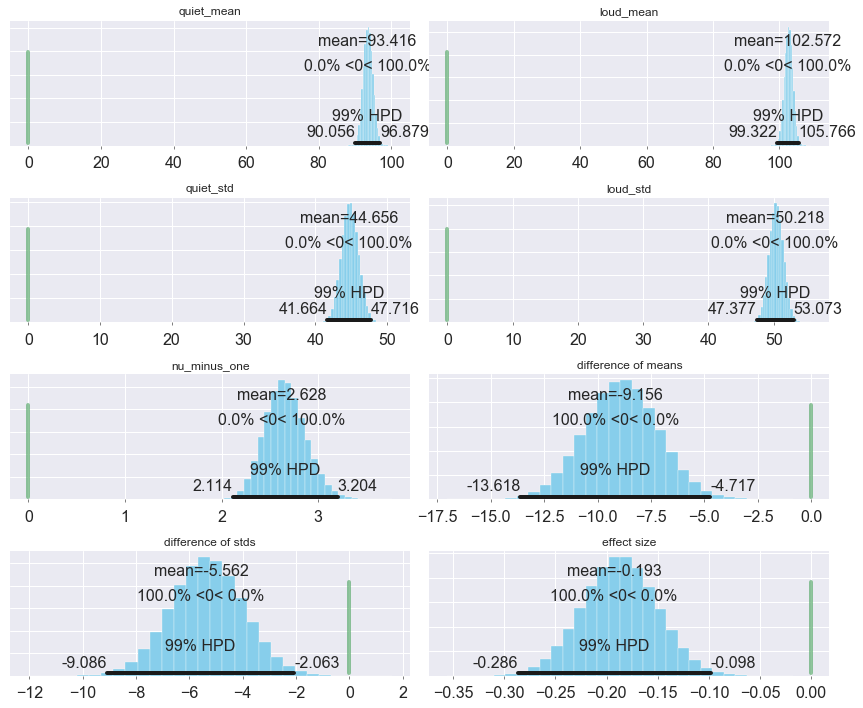

In [16]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# Pdot

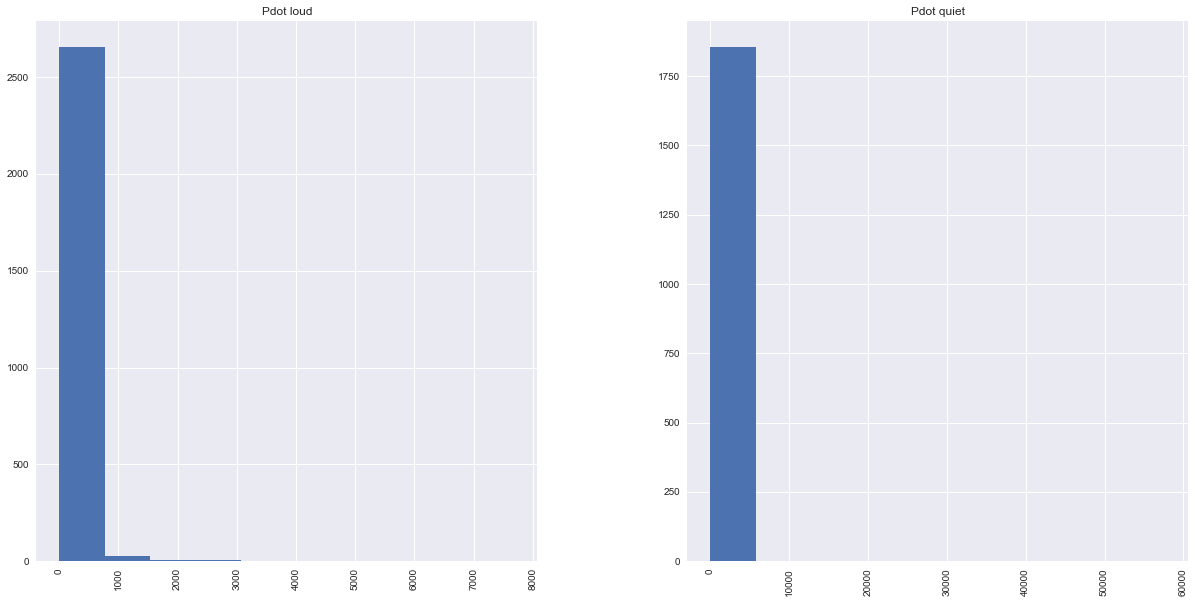

In [20]:
Pdot_quiet = np.array(map(float, qF1R[1]))
Pdot_loud = np.array(map(float, lF1R[1]))

y1 = Pdot_quiet*1e15
y2 = Pdot_loud*1e15
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['Pdot quiet']*len(Pdot_quiet), ['Pdot loud']*len(Pdot_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [21]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() *0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [22]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [09:57<00:00, 368.10it/s]
/usr/local/lib/python2.7/site-packages/pymc3-3.2-py2.7.egg/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 2 contains 12 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
/usr/local/lib/python2.7/site-packages/pymc3-3.2-py2.7.egg/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 1 contains 7 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10f6dd790>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1065dee50>], dtype=object)

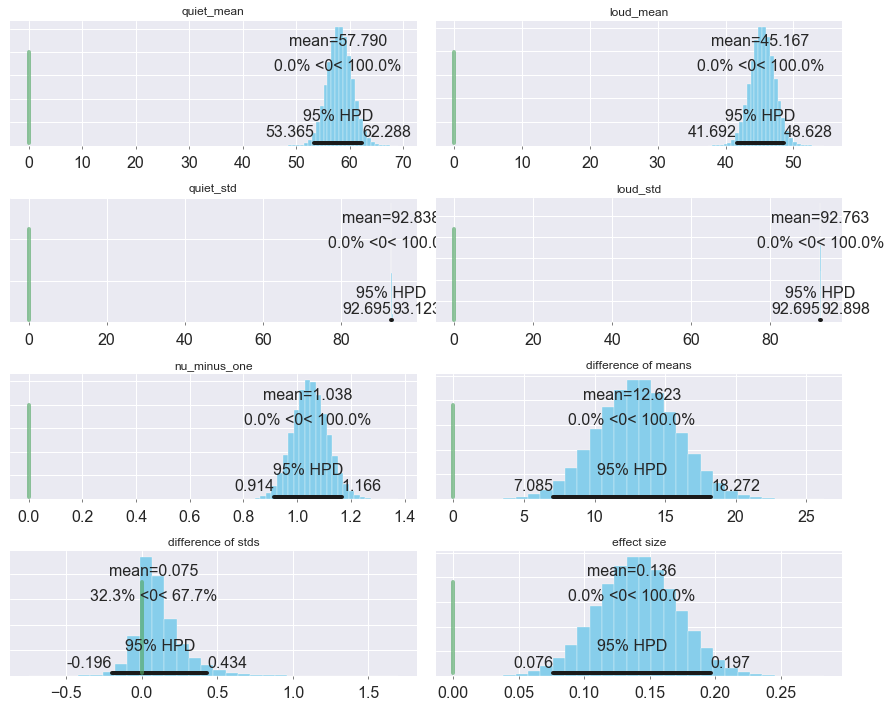

In [23]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x106629d10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1106ae7d0>], dtype=object)

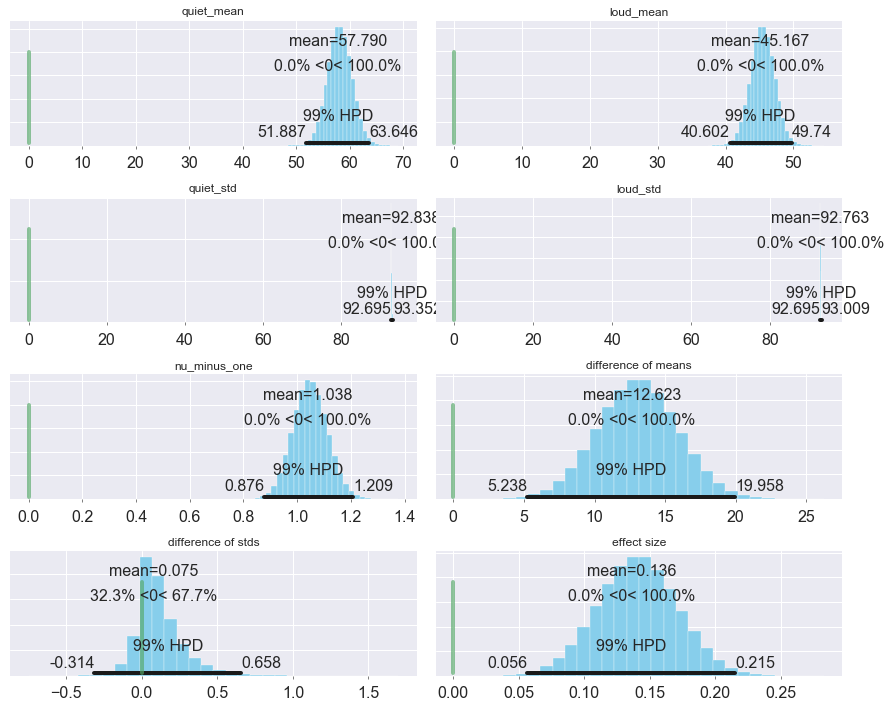

In [24]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# Bs

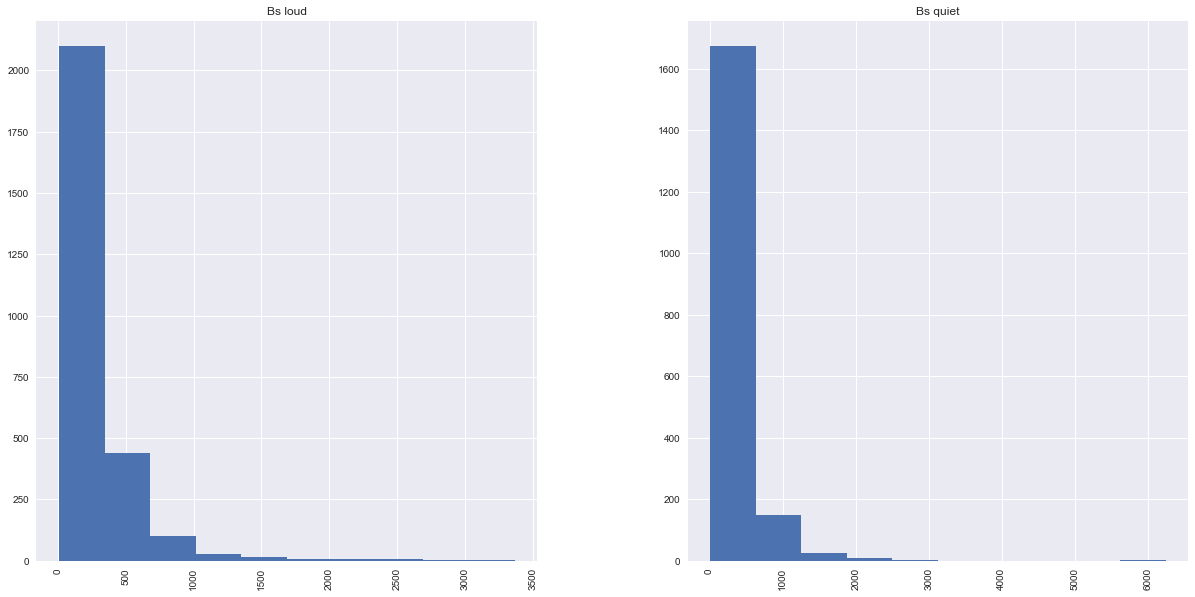

In [25]:
Bs_quiet = np.array(map(float, qF1R[3]))
Bs_loud = np.array(map(float, lF1R[3]))

y1 = Bs_quiet*100
y2 = Bs_loud*100
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['Bs quiet']*len(Bs_quiet), ['Bs loud']*len(Bs_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [26]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() *0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [27]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [09:51<00:00, 372.14it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x111cda4d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1126aa8d0>], dtype=object)

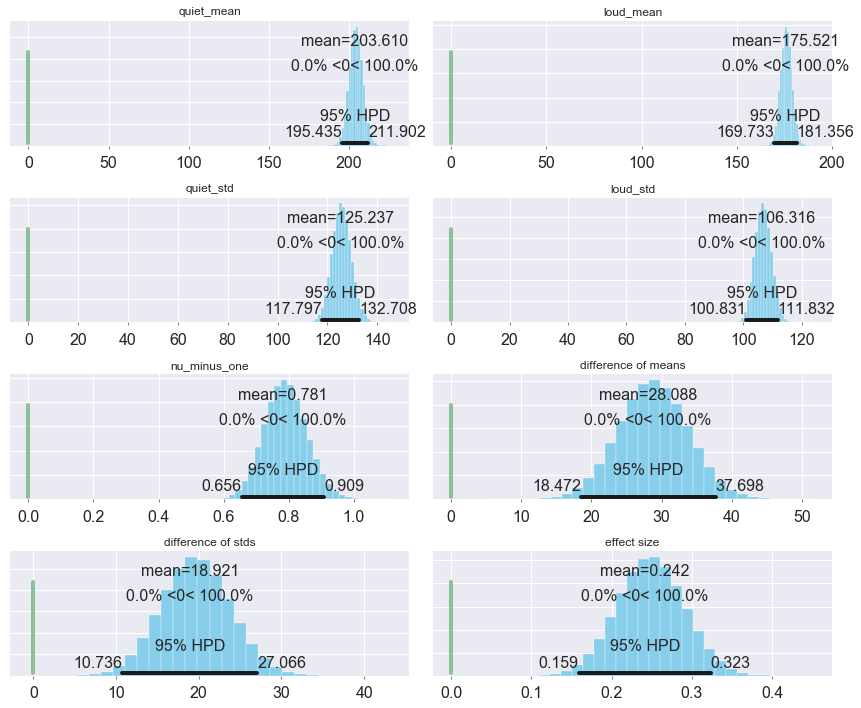

In [28]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x112a21e90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11daafd10>], dtype=object)

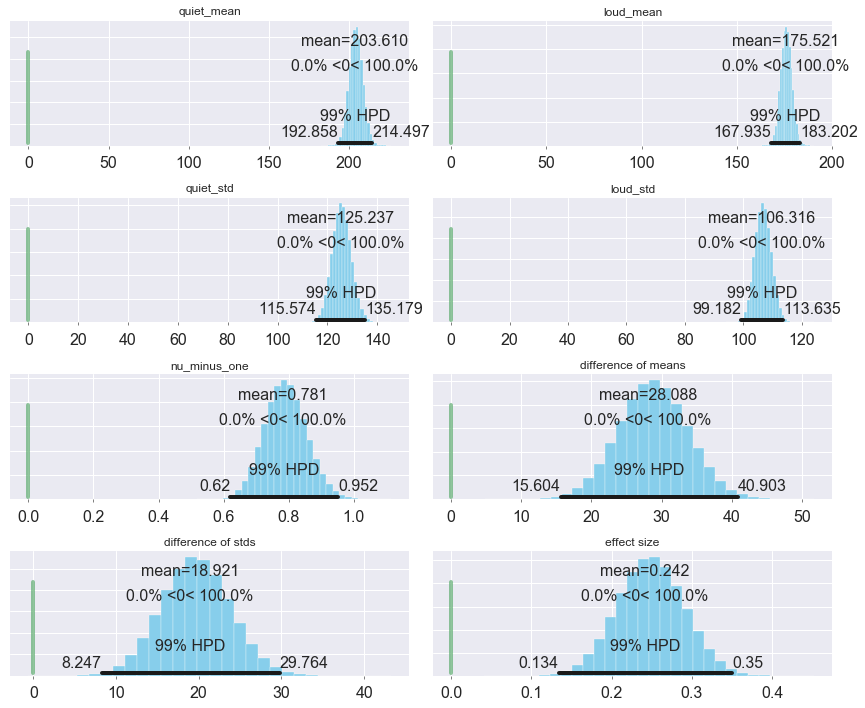

In [29]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# Edot

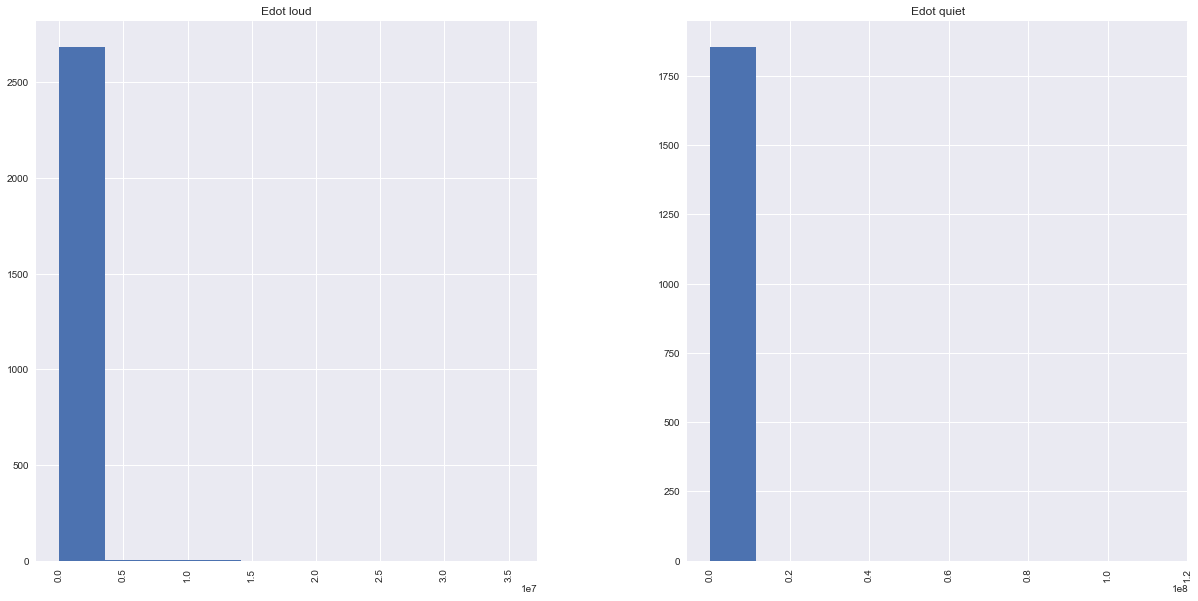

In [33]:
Edot_quiet = np.array(map(float, qF2R[4]))
Edot_loud = np.array(map(float, lF2R[4]))

y1 = Edot_quiet
y2 = Edot_loud
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['Edot quiet']*len(Edot_quiet), ['Edot loud']*len(Edot_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [36]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() *0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [37]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [11:03<00:00, 331.42it/s]
/usr/local/lib/python2.7/site-packages/pymc3-3.2-py2.7.egg/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 1 does not match the target. It is 0.711415792122, but should be close to 0.8. Try to increase the number of tuning steps.
/usr/local/lib/python2.7/site-packages/pymc3-3.2-py2.7.egg/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 1 contains 100 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
/usr/local/lib/python2.7/site-packages/pymc3-3.2-py2.7.egg/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 2 contains 8 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11649ded0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x114431fd0>], dtype=object)

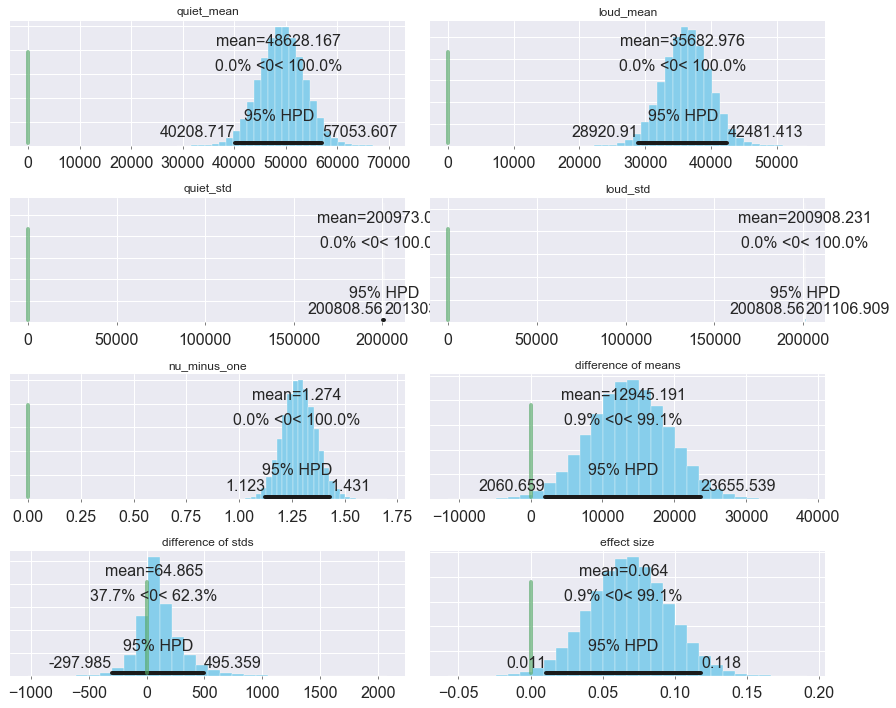

In [38]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1145ca890>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x117407350>], dtype=object)

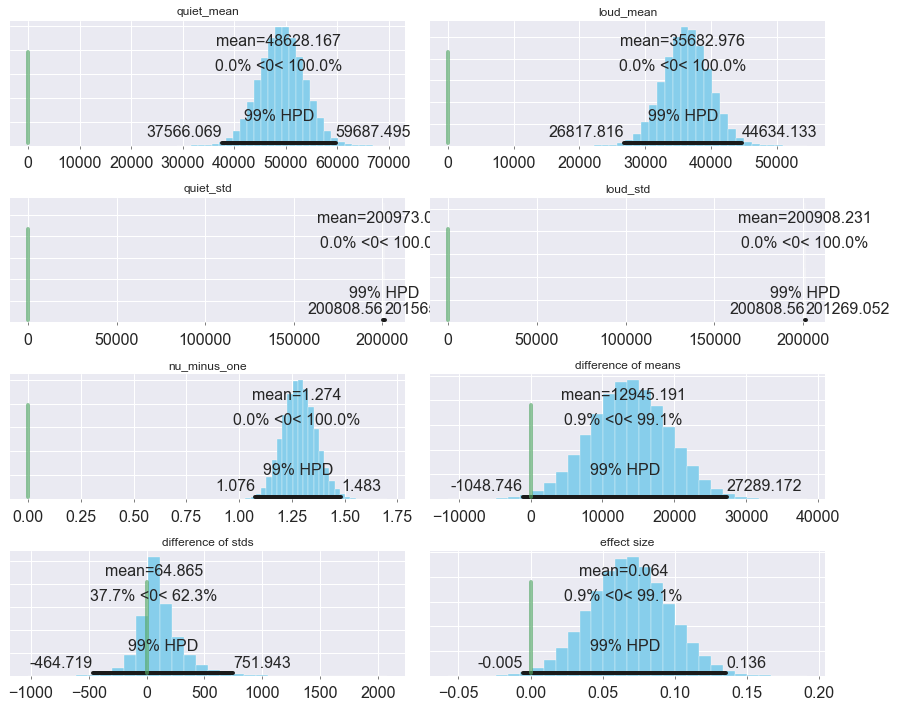

In [39]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# Ecut

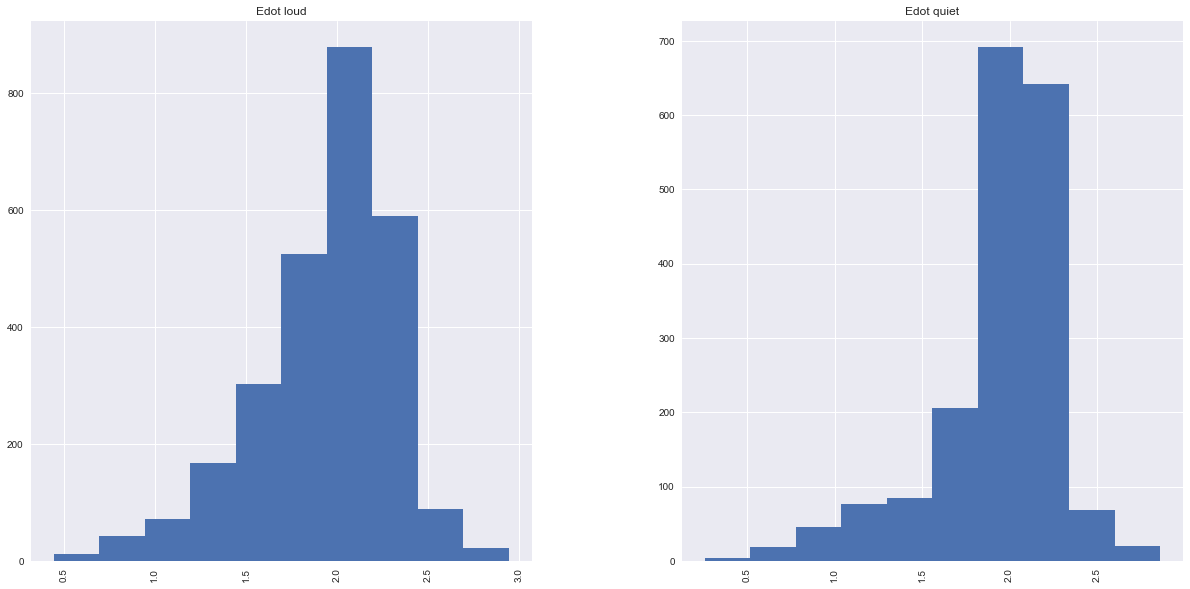

In [40]:
Edot_quiet = np.array(map(float, qF2R[5]))
Edot_loud = np.array(map(float, lF2R[5]))

y1 = Edot_quiet
y2 = Edot_loud
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['Edot quiet']*len(Edot_quiet), ['Edot loud']*len(Edot_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [41]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() *0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [42]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [09:47<00:00, 374.73it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1165b9510>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1144ca810>], dtype=object)

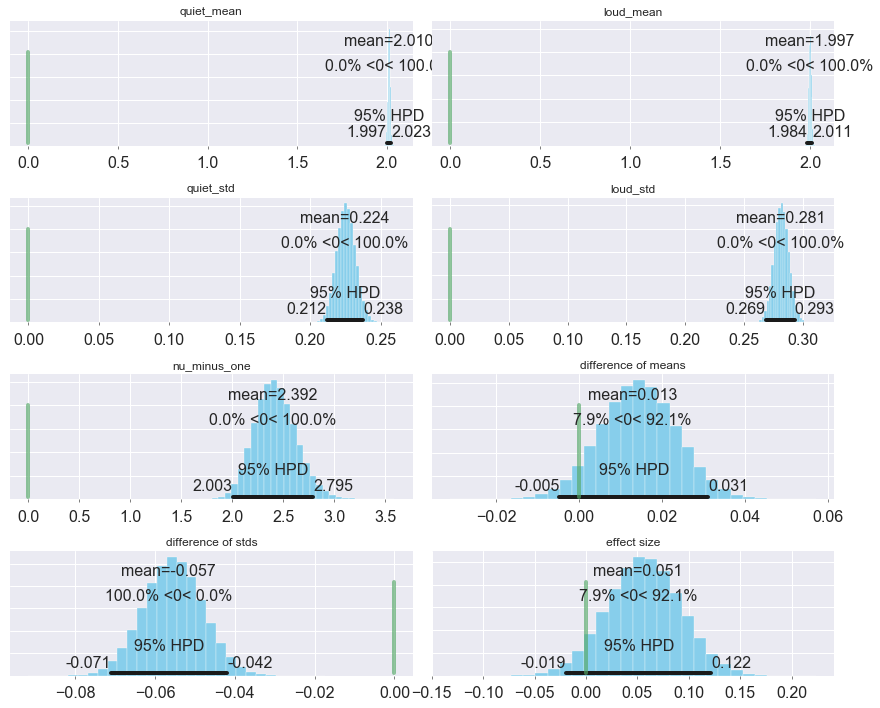

In [48]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1164bd150>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x112bd14d0>], dtype=object)

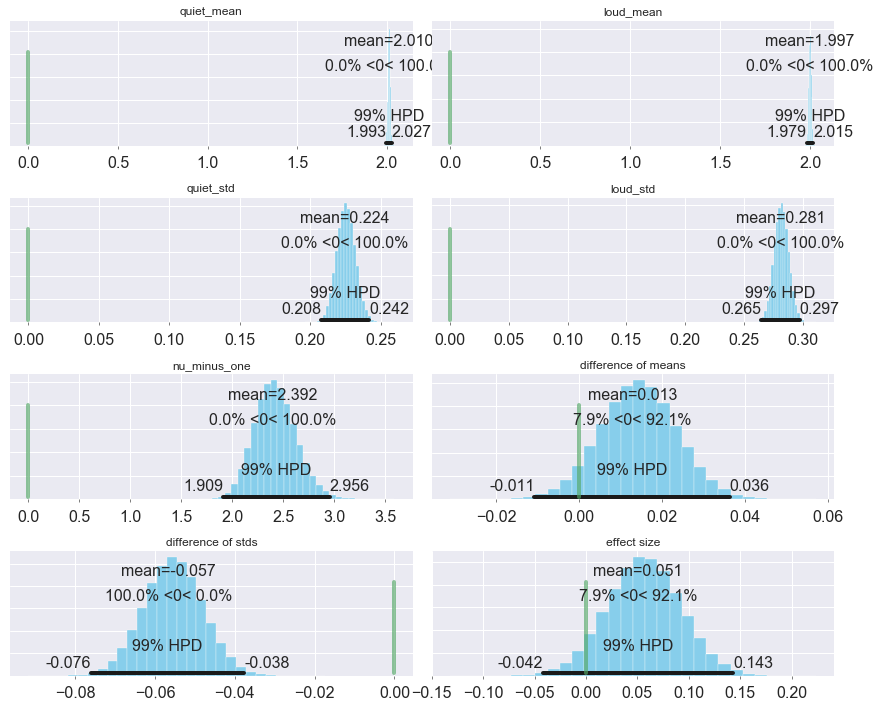

In [49]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# log P

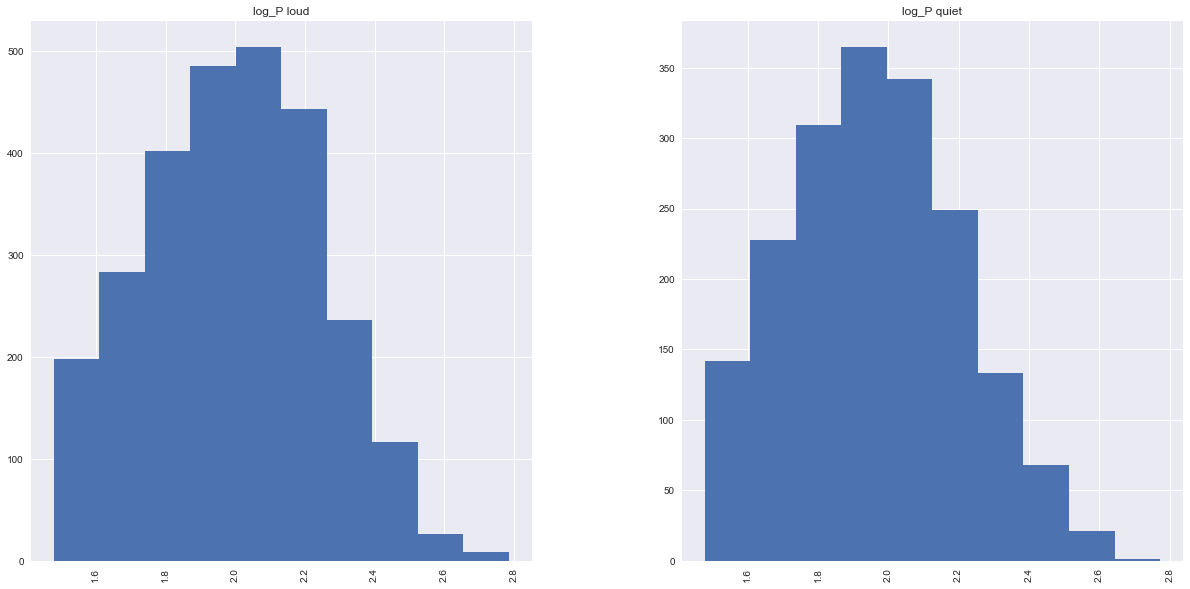

In [50]:
log_P_quiet = np.array(map(float, qF1R[0]))
log_P_loud = np.array(map(float, lF1R[0]))

y1 = np.log10(log_P_quiet*1000)
y2 = np.log10(log_P_loud*1000)
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['log_P quiet']*len(log_P_quiet), ['log_P loud']*len(log_P_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [51]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() *0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [52]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [07:27<00:00, 491.61it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x116633b90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1169743d0>], dtype=object)

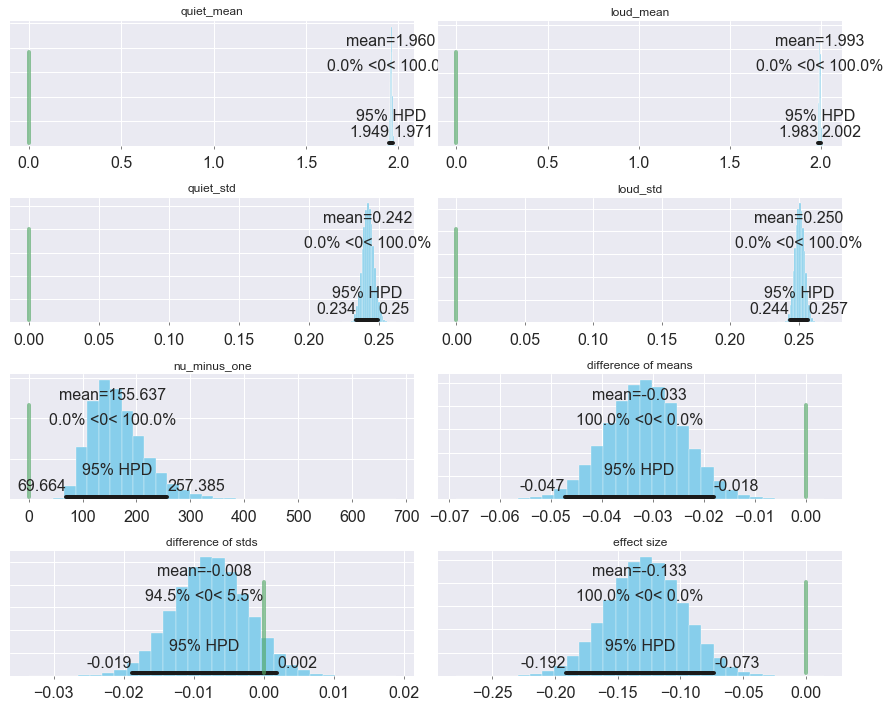

In [53]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x118d69390>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x110b5ee50>], dtype=object)

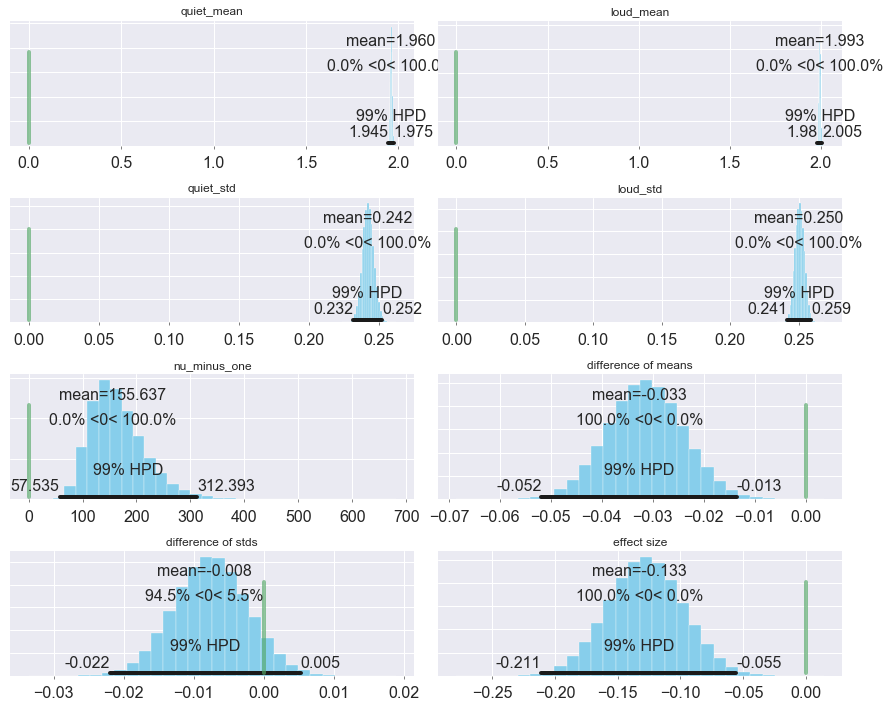

In [54]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# log Pdot

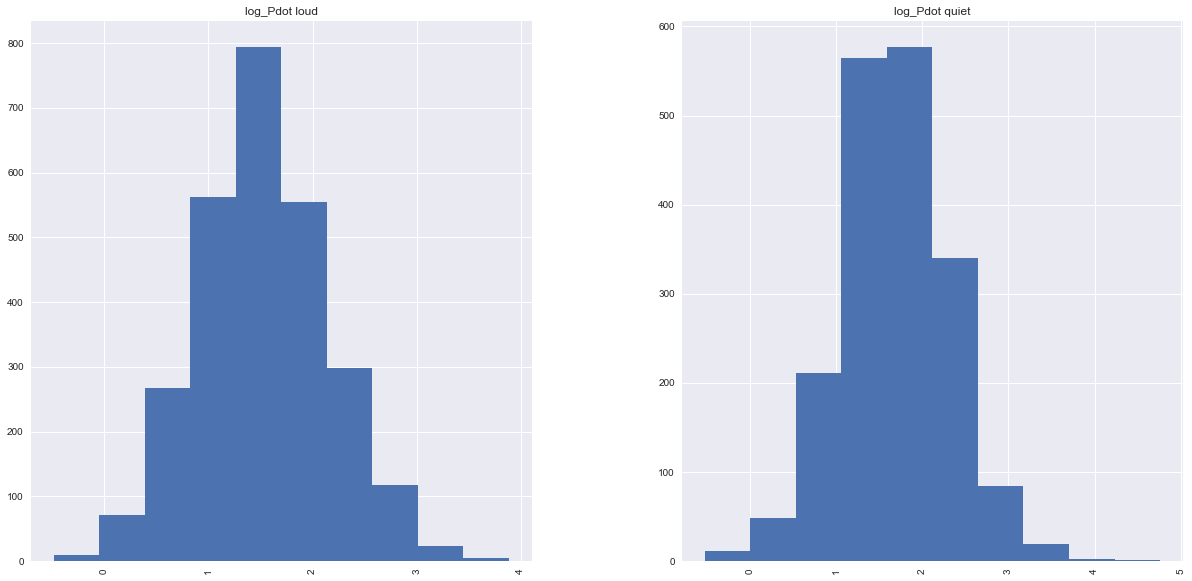

In [56]:
log_Pdot_quiet = np.array(map(float, qF1R[1]))
log_Pdot_loud = np.array(map(float, lF1R[1]))

y1 = np.log10(log_Pdot_quiet*1e15)
y2 = np.log10(log_Pdot_loud*1e15)
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['log_Pdot quiet']*len(log_Pdot_quiet), ['log_Pdot loud']*len(log_Pdot_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [57]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() *0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [58]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [09:40<00:00, 378.68it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11d0c9110>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11a8562d0>], dtype=object)

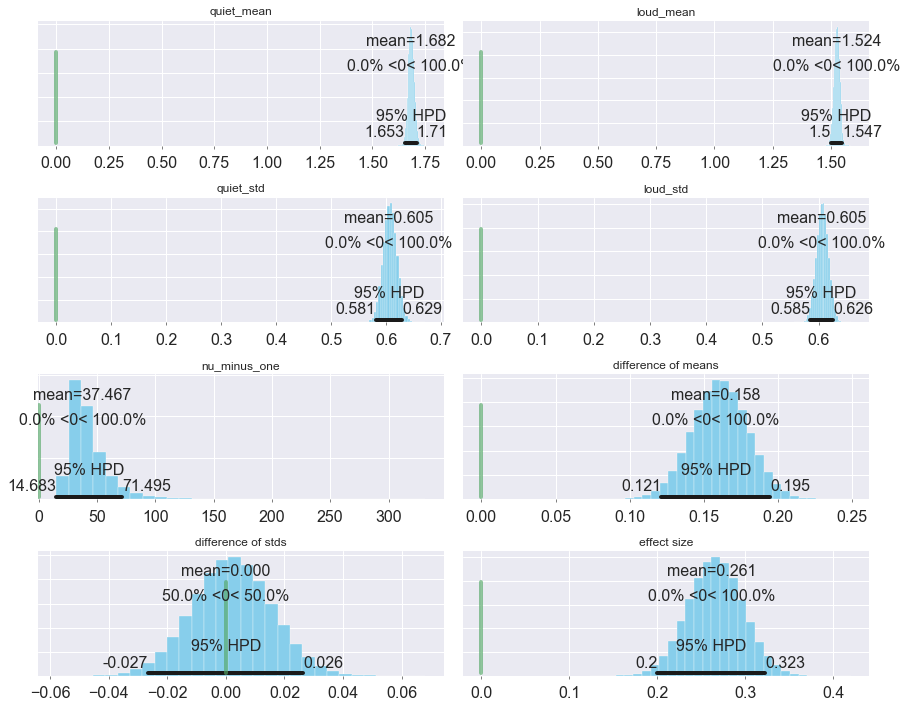

In [59]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11aed9f90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11caa9b90>], dtype=object)

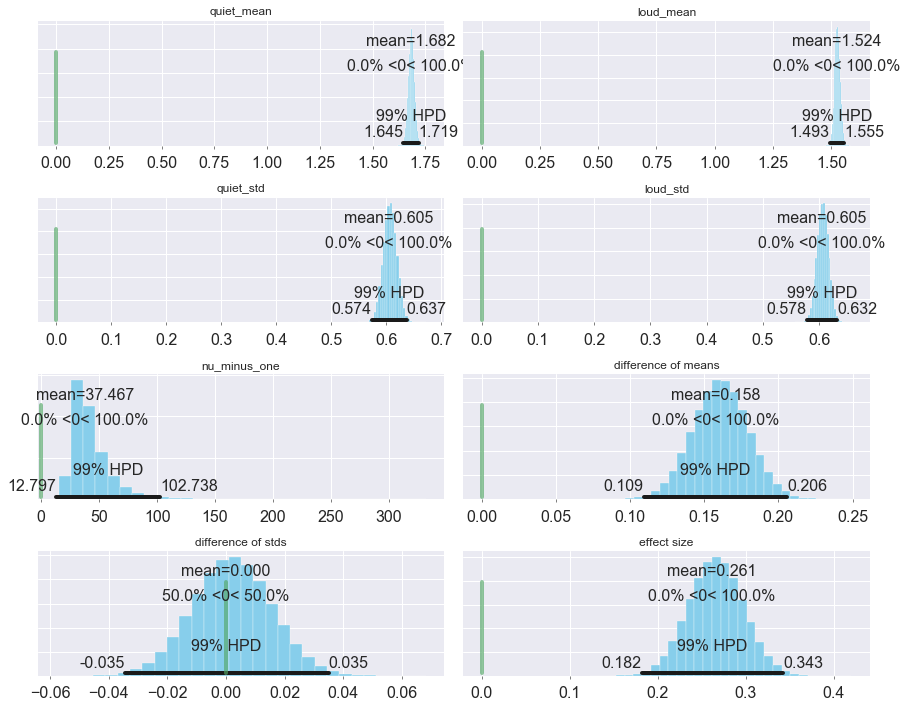

In [60]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# log Bs

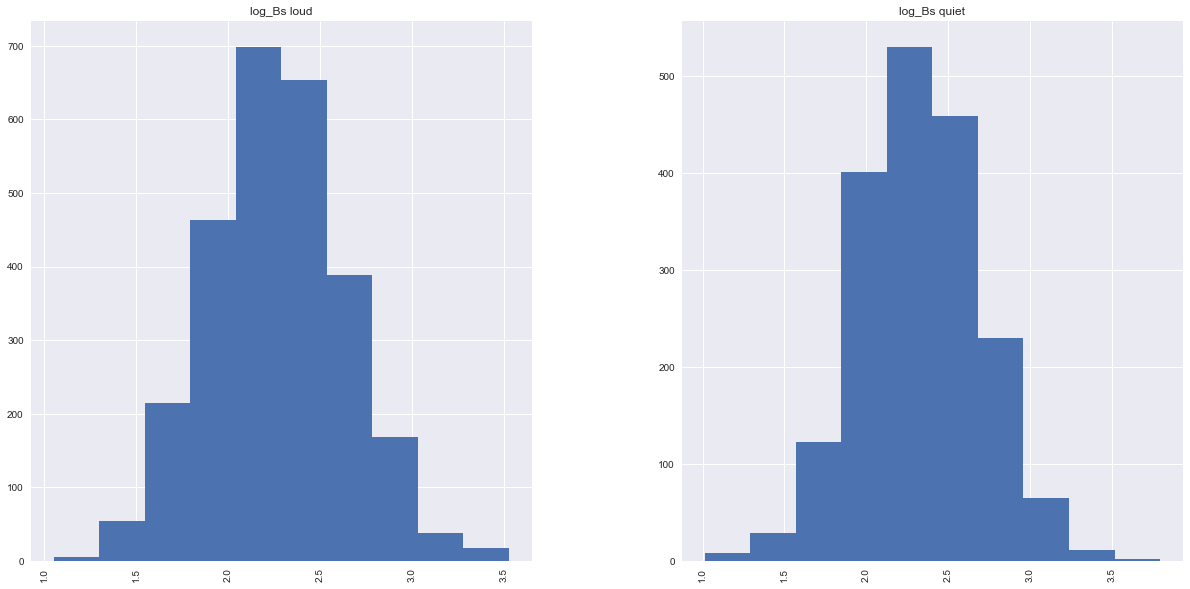

In [61]:
log_Bs_quiet = np.array(map(float, qF1R[3]))
log_Bs_loud = np.array(map(float, lF1R[3]))

y1 = np.log10(log_Bs_quiet*100)
y2 = np.log10(log_Bs_loud*100)
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['log_Bs quiet']*len(log_Bs_quiet), ['log_Bs loud']*len(log_Bs_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [62]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() *0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [63]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [09:11<00:00, 398.70it/s]
/usr/local/lib/python2.7/site-packages/pymc3-3.2-py2.7.egg/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 2 contains 51 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11b58e190>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1194db890>], dtype=object)

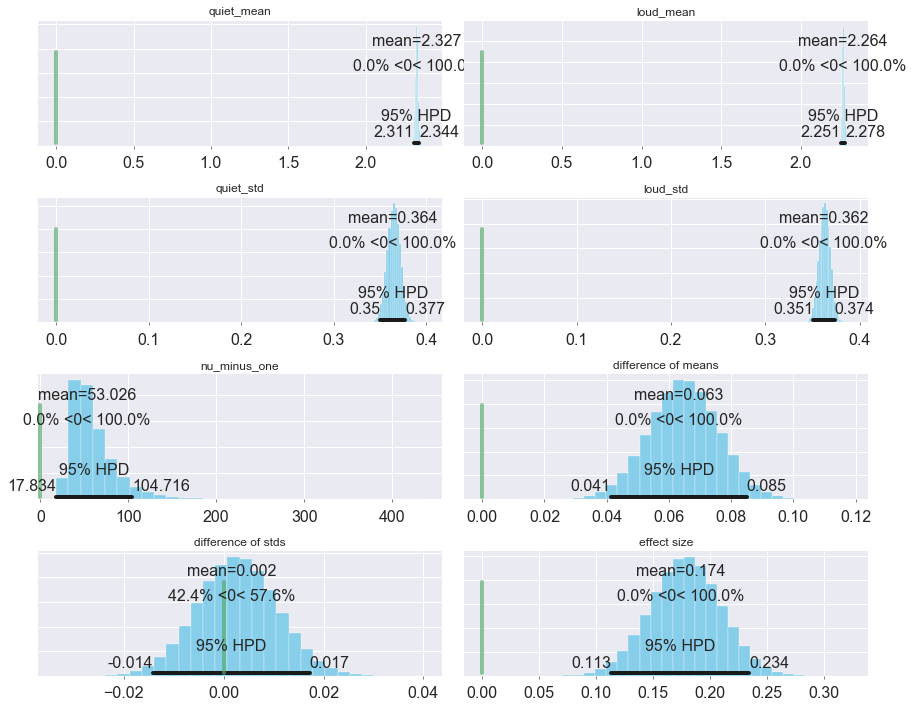

In [64]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11a488a10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11b866210>], dtype=object)

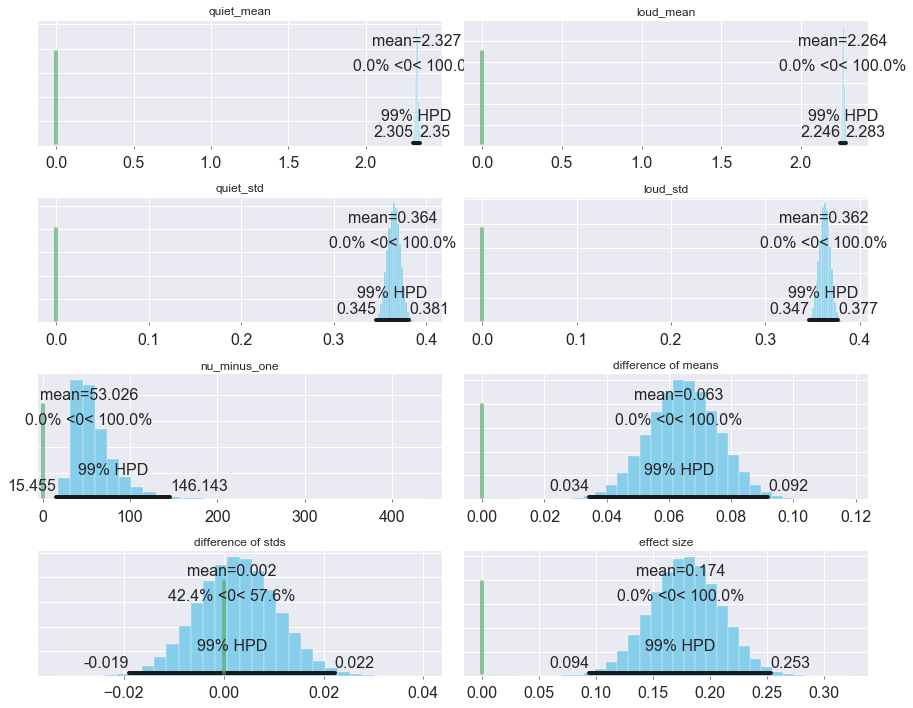

In [65]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# log Edot

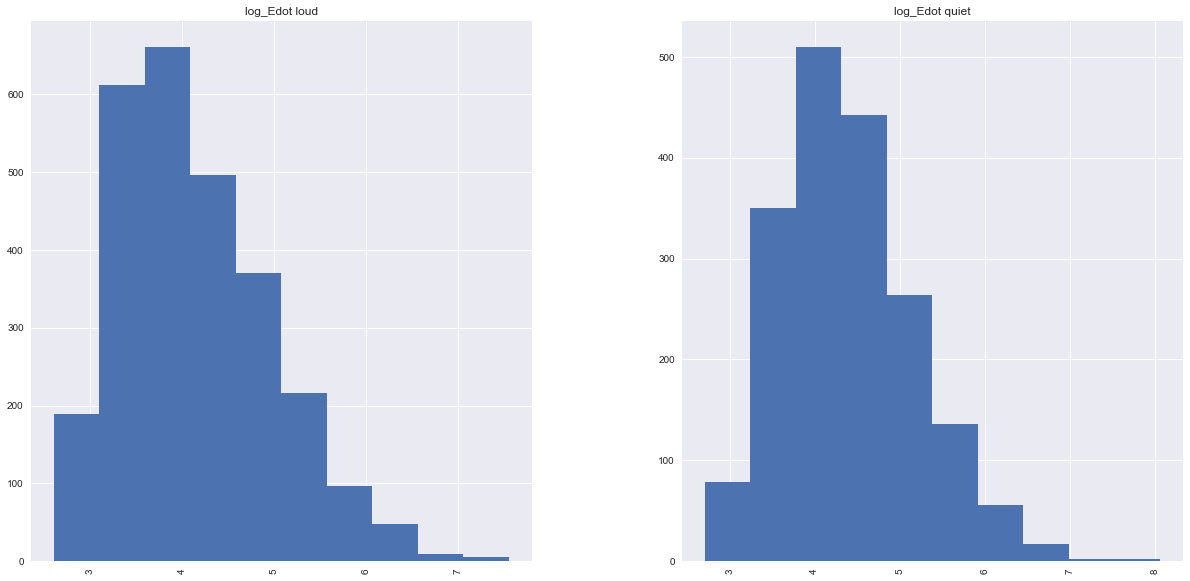

In [66]:
log_Edot_quiet = np.array(map(float, qF2R[4]))
log_Edot_loud = np.array(map(float, lF2R[4]))

y1 = np.log10(log_Edot_quiet)
y2 = np.log10(log_Edot_loud)
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['log_Edot quiet']*len(log_Edot_quiet), ['log_Edot loud']*len(log_Edot_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [67]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() *0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [68]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [09:34<00:00, 382.80it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12029b910>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11b631d90>], dtype=object)

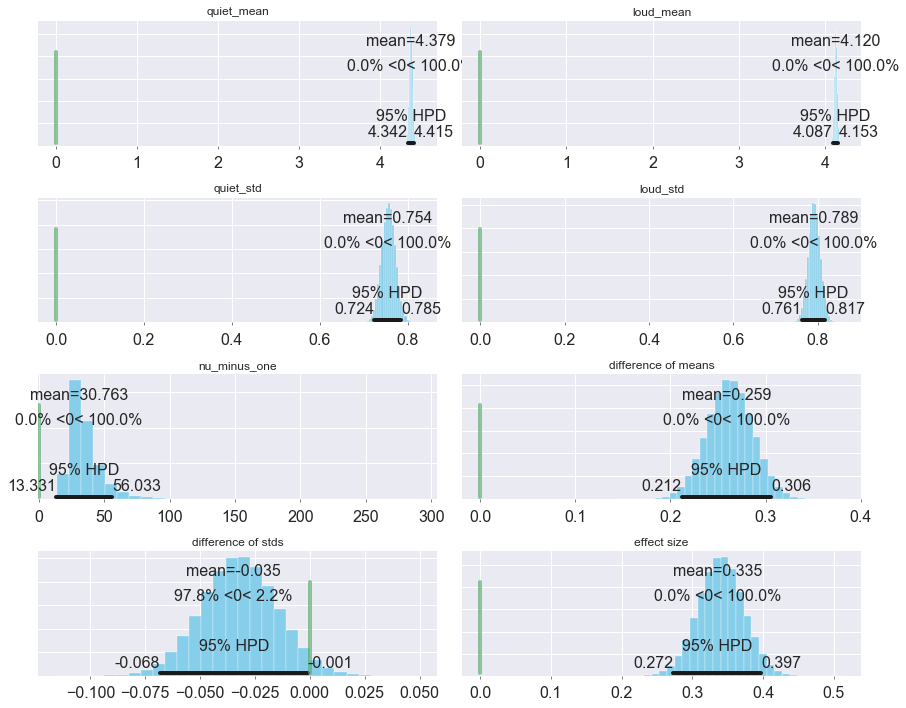

In [69]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11b655dd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1206fcc50>], dtype=object)

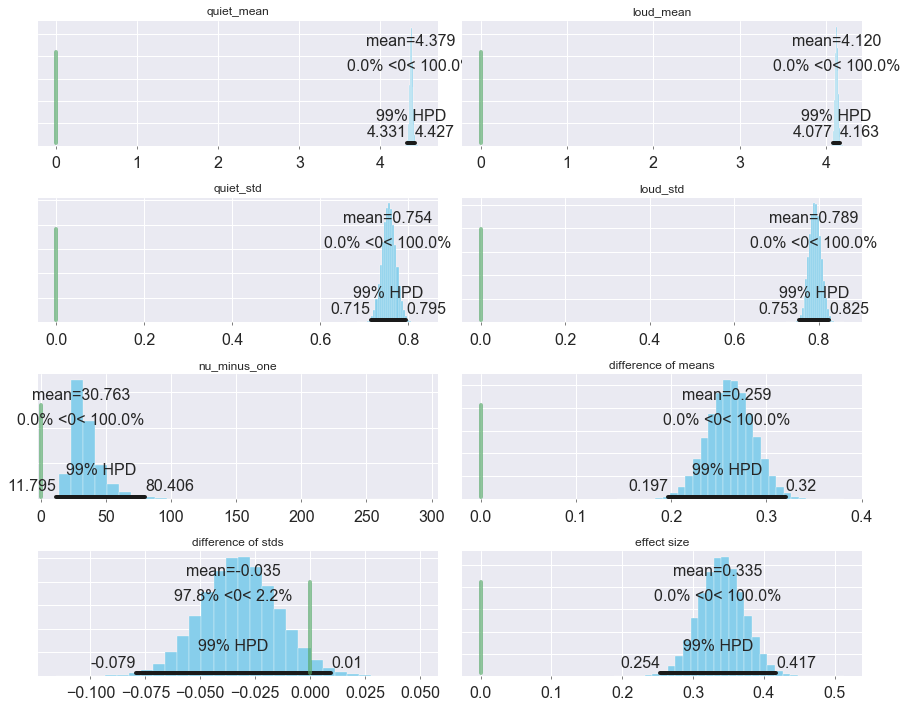

In [70]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

# log Ecut

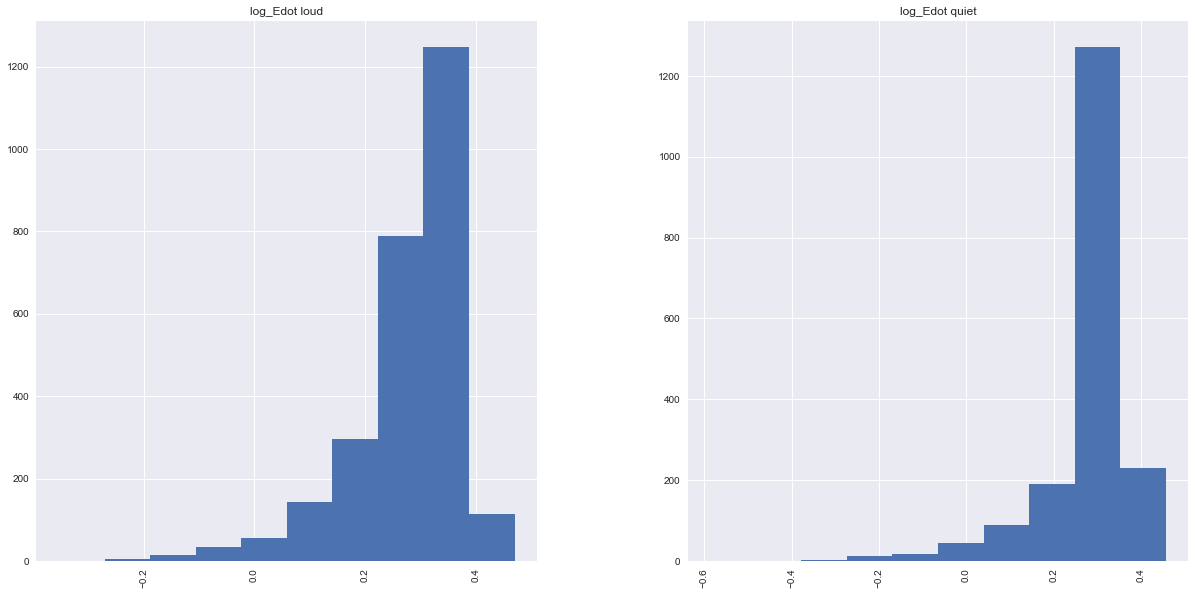

In [71]:
log_Edot_quiet = np.array(map(float, qF2R[5]))
log_Edot_loud = np.array(map(float, lF2R[5]))

y1 = np.log10(log_Edot_quiet)
y2 = np.log10(log_Edot_loud)
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['log_Edot quiet']*len(log_Edot_quiet), ['log_Edot loud']*len(log_Edot_loud)]))

y.hist('value', by='group',figsize=(20,10));

In [72]:
mu_m = y.value.mean()
mu_s = y.value.std() * 2

sigma_low = y.value.std() *0.1
sigma_high = y.value.std() * 10

with pm.Model() as model:
    quiet_mean = pm.Normal('quiet_mean', mu_m, sd=mu_s)
    loud_mean = pm.Normal('loud_mean', mu_m, sd=mu_s)
    
    quiet_std = pm.Uniform('quiet_std', lower=sigma_low, upper=sigma_high)
    loud_std = pm.Uniform('loud_std', lower=sigma_low, upper=sigma_high)
    
    nu = pm.Exponential('nu_minus_one', 1/29.) + 1
    
    quiet_lambda = quiet_std**-2
    loud_lambda = loud_std**-2
    
    quiet_group = pm.StudentT('quiet', nu=nu, mu=quiet_mean, lam=quiet_lambda, observed=y1)
    loud_group = pm.StudentT('loud', nu=nu, mu=loud_mean, lam=loud_lambda, observed=y2)
    
    diff_of_means = pm.Deterministic('difference of means', quiet_mean - loud_mean)
    diff_of_stds = pm.Deterministic('difference of stds', quiet_std - loud_std)
    effect_size = pm.Deterministic('effect size', 
                                   diff_of_means / np.sqrt((quiet_std**2 + loud_std**2) / 2))

In [73]:
with model:
    trace = pm.sample(200000, tune=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 220000/220000 [09:31<00:00, 384.67it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11912d410>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1128964d0>], dtype=object)

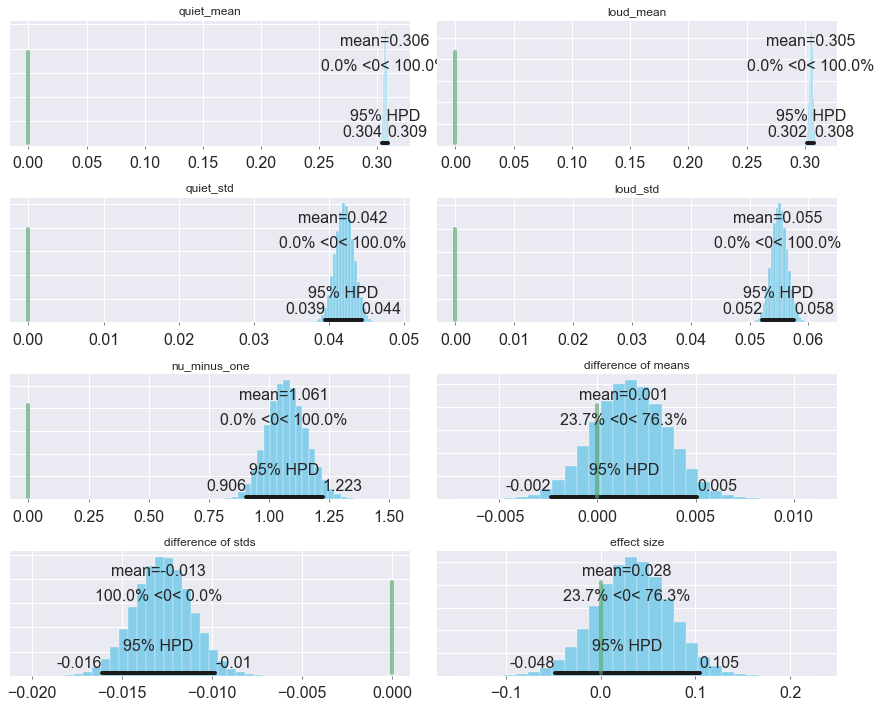

In [74]:
pm.plot_posterior(trace, alpha_level=0.05,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11dbf4810>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1202cbf50>], dtype=object)

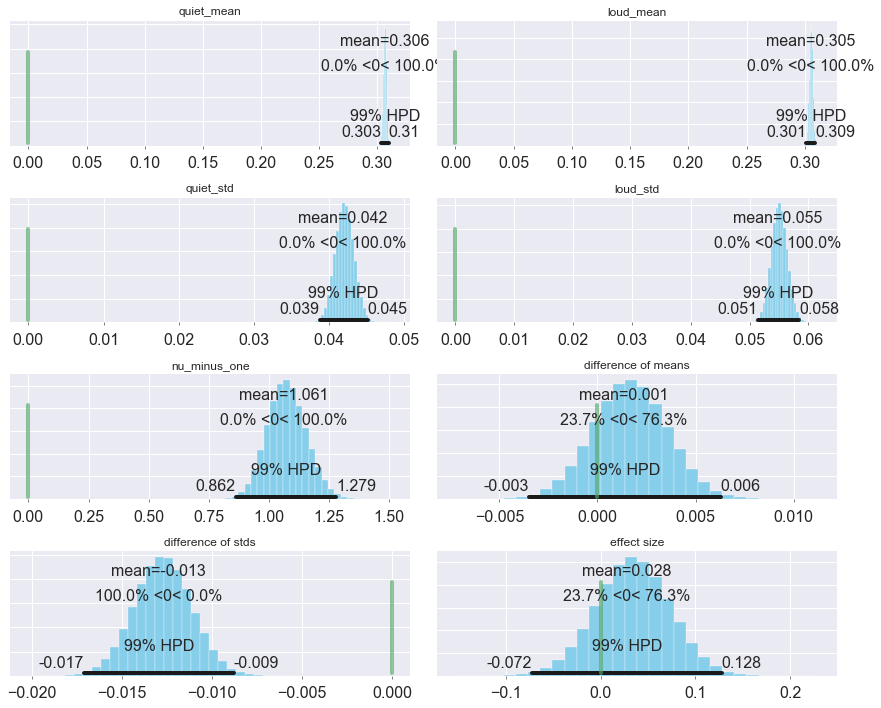

In [75]:
pm.plot_posterior(trace, alpha_level=0.01,
                  varnames=['quiet_mean','loud_mean', 'quiet_std', 'loud_std', 'nu_minus_one',
                            'difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

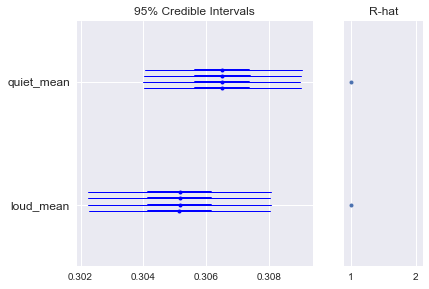

In [76]:
pm.forestplot(trace, varnames=['quiet_mean',
                               'loud_mean']);

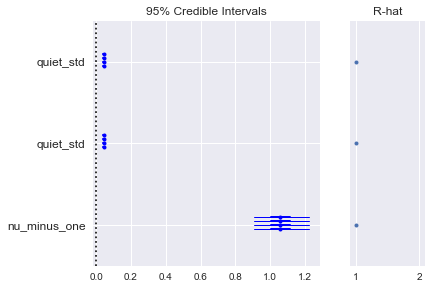

In [77]:
pm.forestplot(trace, varnames=['quiet_std',
                               'quiet_std',
                               'nu_minus_one']);